# Spaceship Titanic Classifier 🚀

# Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

## Data Field Descriptions

- ```PassengerId``` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
- ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- ```Destination``` - The planet the passenger will be debarking to.
- ```Age``` - The age of the passenger.
- ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
- ```RoomService```, ```FoodCourt```, ```ShoppingMall```, ```Spa```, ```VRDeck``` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- ```Name``` - The first and last names of the passenger.
- ```Transported``` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Importing Data

In [202]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_theme(style="dark",palette="deep")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [203]:
train_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

## Drop irrelevant columns


In [204]:
train_data = train_data.drop(["PassengerId", "Name"], axis=1)

# Exploring Training Data

In [205]:
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [206]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [207]:
train_data = train_data.astype({"CryoSleep": bool})

In [208]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

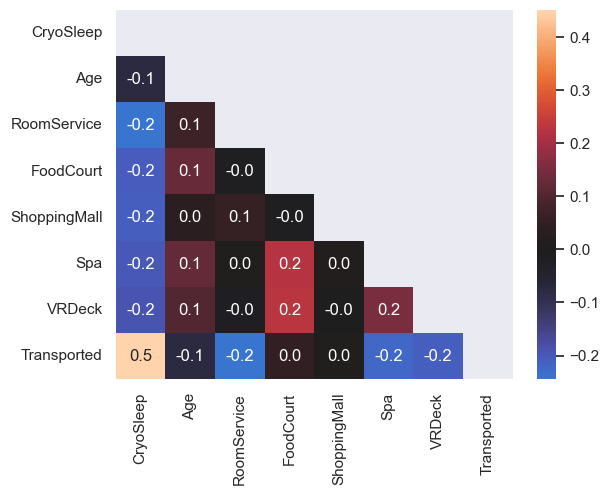

In [209]:
corr = train_data.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0,)

## Numerical Columns

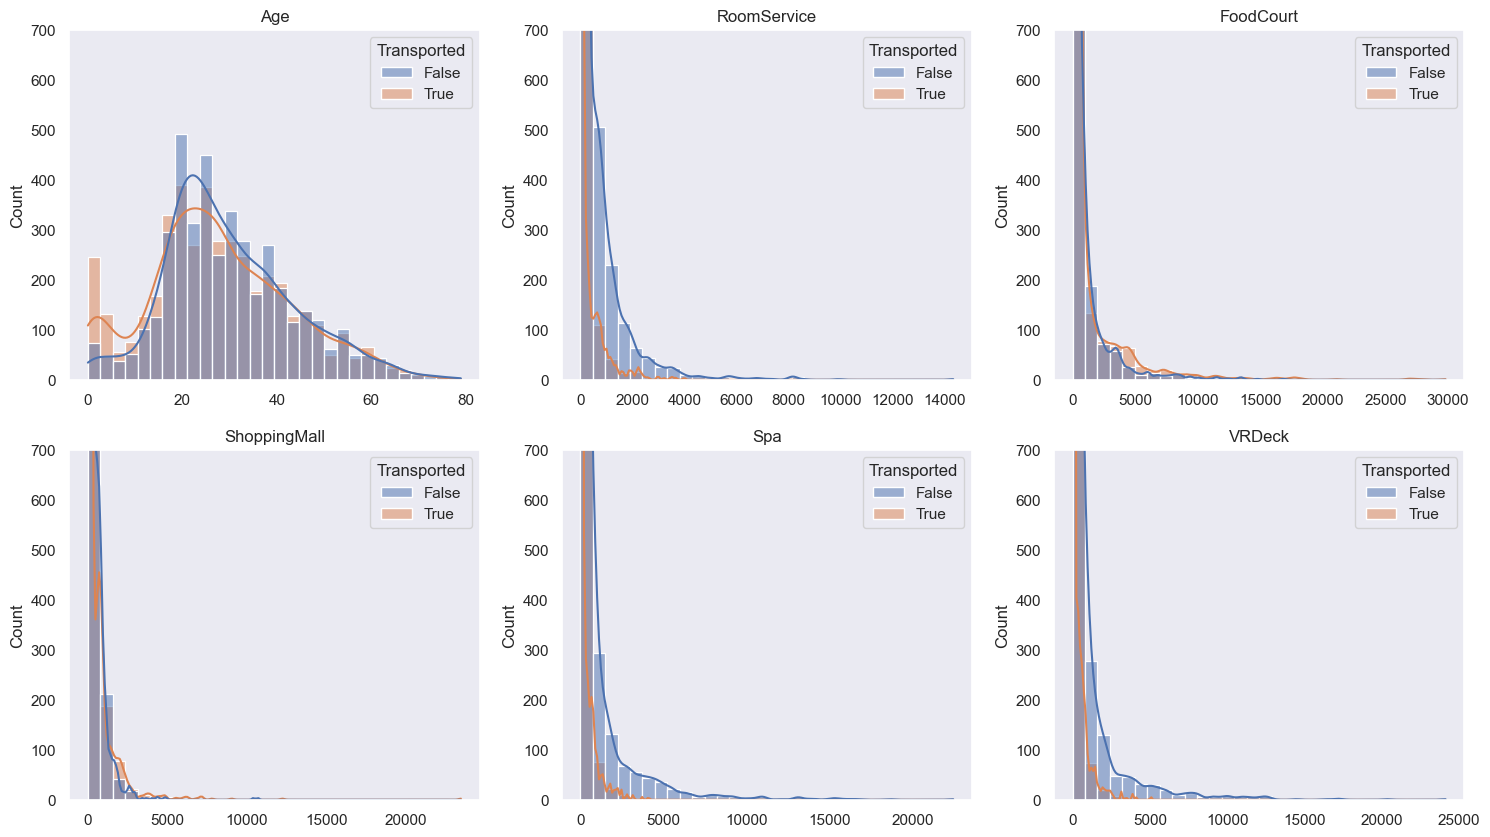

In [210]:
categories = np.reshape(["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], (2,3))

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i in range(2):
    for j in range(3):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=train_data[categories[i][j]], hue=train_data.Transported, bins=30, ax=axs[i][j], kde=True).set(xlabel=None)
        axs[i][j].set_ylim(0,700)

The majority of the sample is composed of young adults (about 20-30 years old)

Also, most of the young individuals (0-19 years old) survived

## Categorical Columns

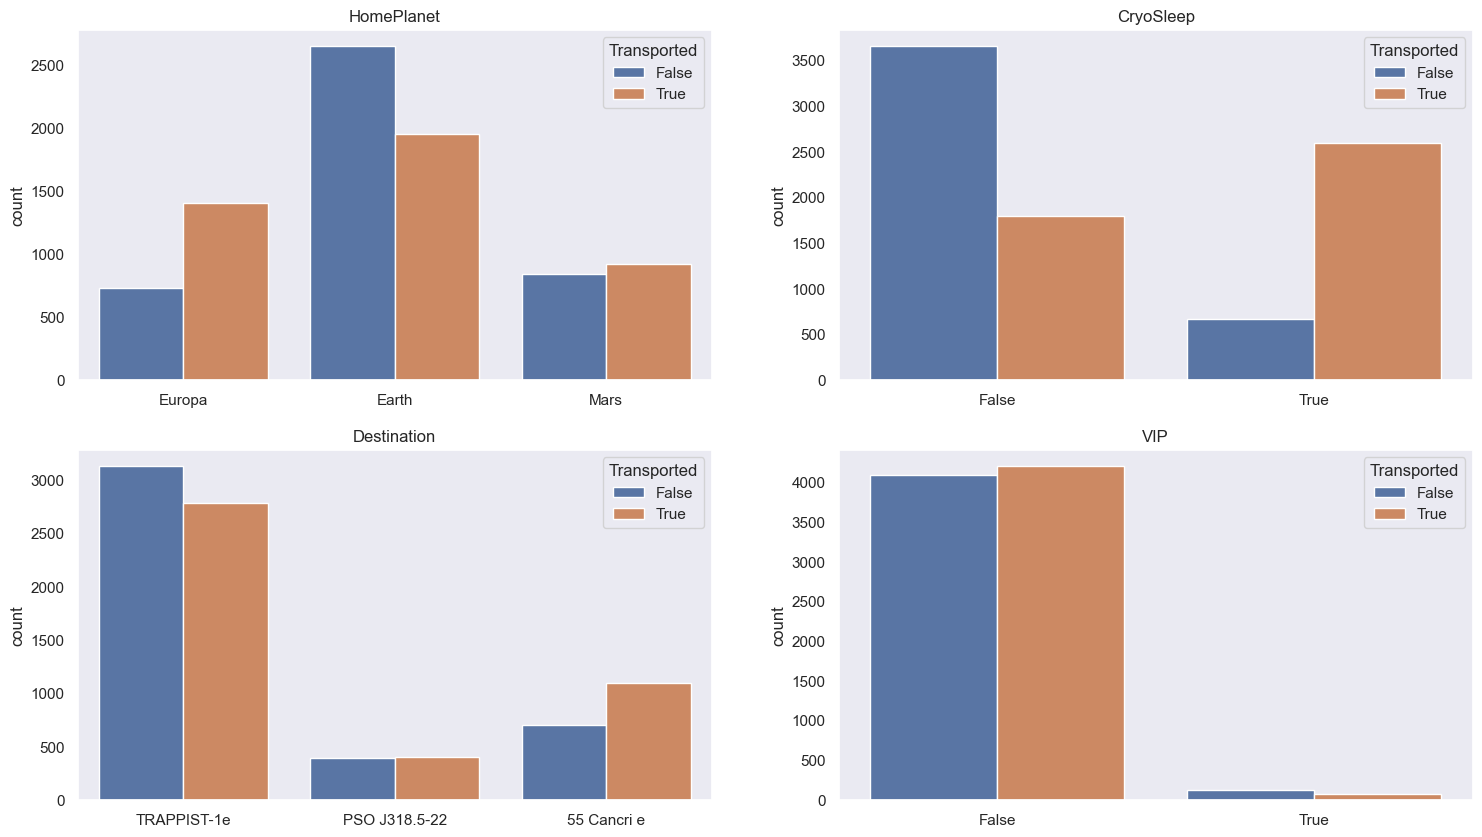

In [211]:
categories = np.reshape(["HomePlanet", "CryoSleep", "Destination", "VIP"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(18, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.countplot(x=train_data[categories[i][j]], hue=train_data.Transported, ax=axs[i][j]).set(xlabel=None)

Majority of passengers in Cryo Sleep survived

# Feature Engineering

## Cabin

Cabins are registred in "deck/num/side" form. We'll sepperate it into different columns

In [212]:
cabins = train_data.Cabin.str.split("/", expand=True)
cabins = cabins.rename(columns={0: "CabinDeck", 1: "CabinNumber", 2: "CabinSide"})
cabins.head()

,CabinDeck,CabinNumber,CabinSide
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [213]:
train_data = train_data.drop("Cabin", axis=1)
train_data = pd.concat([train_data, cabins], axis=1)

In [214]:
train_data = train_data.astype({"CabinNumber": float})

<Axes: xlabel='CabinSide', ylabel='count'>

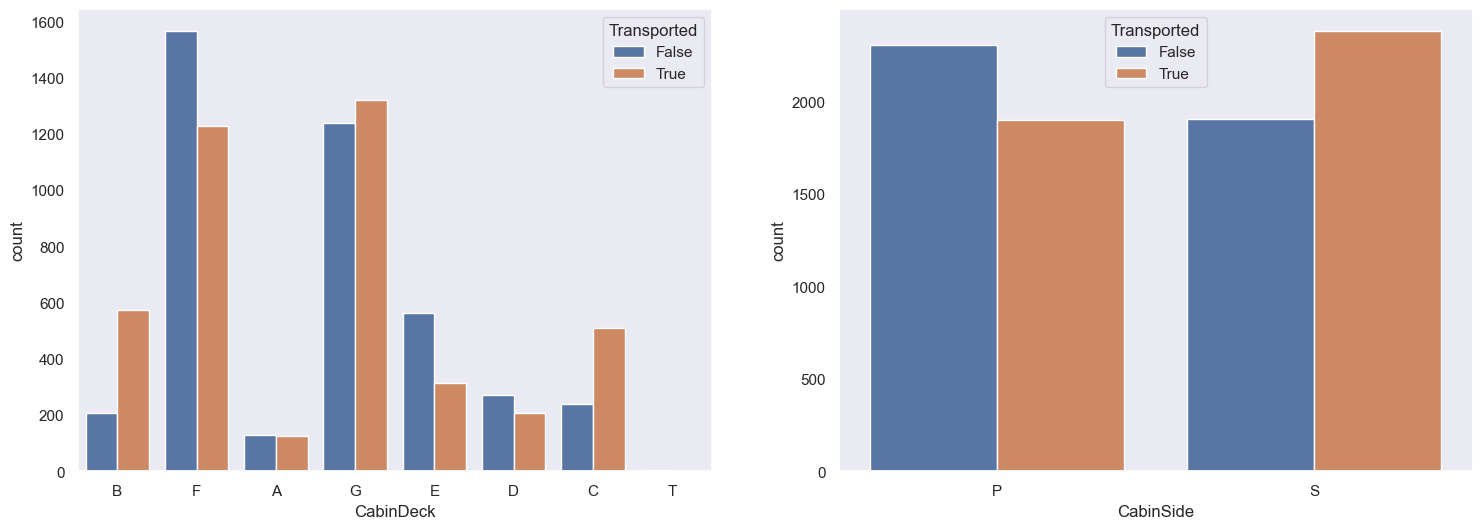

In [215]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x=train_data["CabinDeck"], hue=train_data.Transported, ax=axs[0])

sns.countplot(x=train_data["CabinSide"], hue=train_data.Transported, ax=axs[1])

<Axes: xlabel='CabinDeck', ylabel='count'>

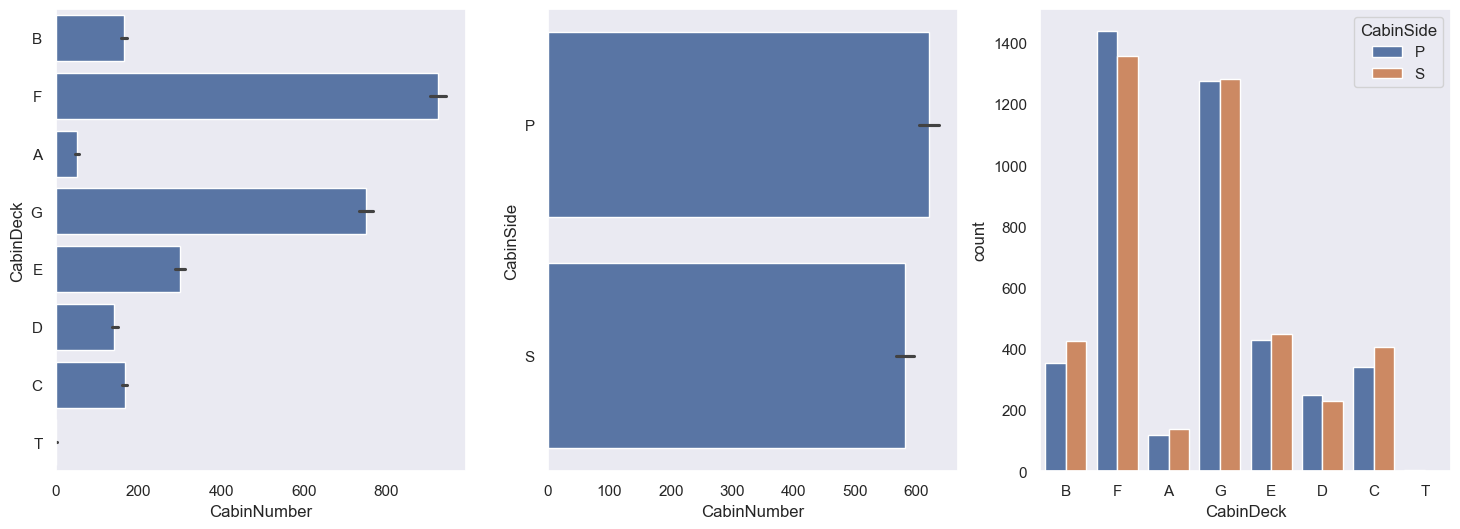

In [216]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=train_data, x="CabinNumber", y="CabinDeck", ax=axs[0])

sns.barplot(data=train_data, x="CabinNumber", y="CabinSide", ax=axs[1])

sns.countplot(data=train_data, x="CabinDeck", hue="CabinSide", ax=axs[2])

In [217]:
# Cabin Deck and Number combination have influence on the result
train_data["CabinCombination"] = train_data["CabinDeck"] + train_data["CabinNumber"].astype(str)

## Service Expense

Sum RoomService, FoodCourt, ShoppingMall, Spa and VRDeck to find total expense
See if individual didn't spend on services

In [218]:
train_data["ServiceExpense"] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

train_data["NoExpenses"] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].gt(0).sum(axis=1)
train_data["NoExpenses"] = train_data["NoExpenses"].apply(lambda x: 1 if x == 0 else 0)
train_data = train_data.astype({"NoExpenses": bool})

<Axes: title={'center': 'No Expenses'}, xlabel='NoExpenses', ylabel='count'>

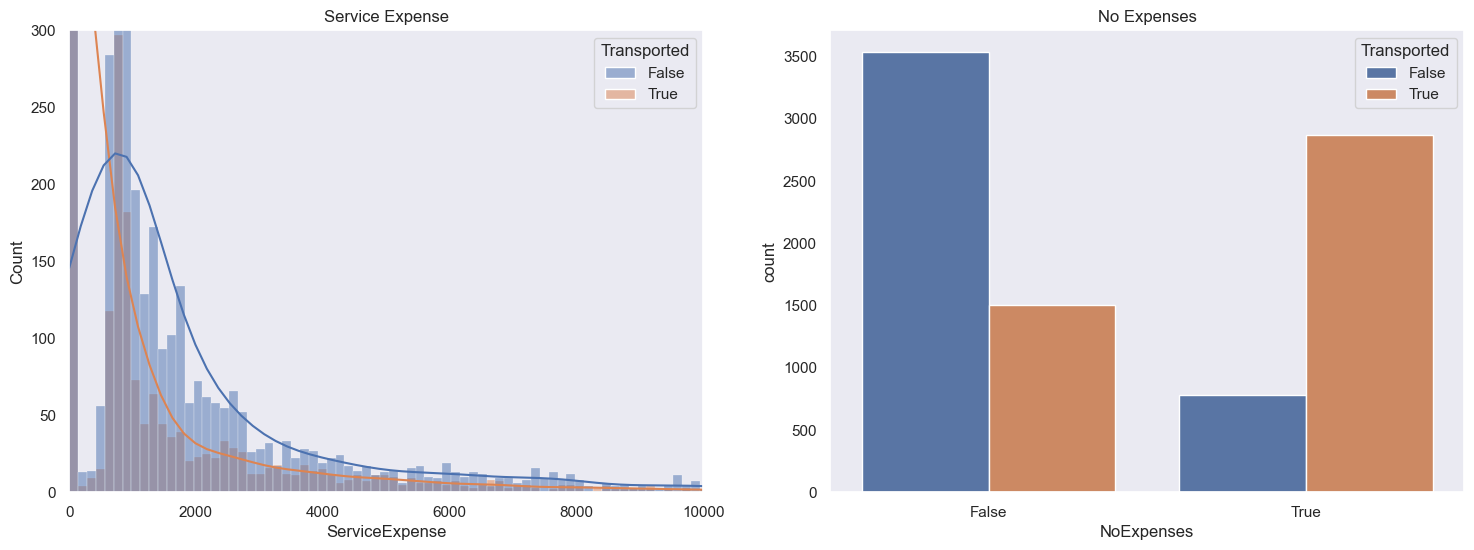

In [219]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].set_title("Service Expense")
sns.histplot(x=train_data["ServiceExpense"], hue=train_data.Transported, kde=True, ax=axs[0])
axs[0].set_ylim(0,300)
axs[0].set_xlim(0,10000)

axs[1].set_title("No Expenses")
sns.countplot(x=train_data["NoExpenses"], hue=train_data.Transported, ax=axs[1])

## Age groups

We'll group individuals in age intervals

In [220]:
# def group_ages(df):
#     lab_=["Age_0-18","Age_19-25","Age_26-32","Age_33_50","age_50+"]
#     bin_=[0,18,25,32,50,float('inf')]
#     df["age_group"]=pd.cut(df["Age"],labels=lab_,bins=bin_)
    
# group_ages(train_data)

In [221]:
# plt.figure(figsize=(12,6))
# sns.countplot(x=train_data["age_group"],hue="Transported",data=train_data)

We'll use Kmeans clustering for that. But before, we must not have missing values, so we'll use a SimpleImputer.

In [222]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

train_data_ages = train_data.loc[:,["Age"]]

cluster_imputer = SimpleImputer(strategy='most_frequent')
train_data_ages = cluster_imputer.fit_transform(train_data_ages)

kmeans = KMeans(n_clusters=6, random_state=1)
train_data["AgeCluster"] = kmeans.fit_predict(train_data_ages)
train_data["AgeCluster"] = train_data["AgeCluster"].astype("category")

<Axes: xlabel='AgeCluster', ylabel='Age'>

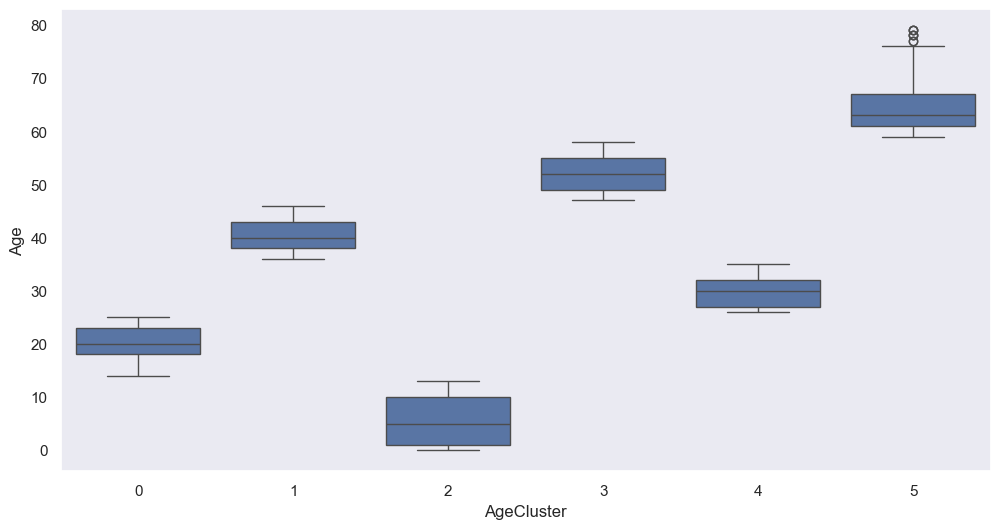

In [223]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data, x="AgeCluster", y="Age")

# Model Evaluation

## Prepare Training Data

In [224]:
X = train_data.drop(["Transported"], axis=1)
y = train_data.Transported

## XGBoost and GridSearchCV

We'll evaluate a XGBoostClassifier. We'll set up a Pipeline for encodings (XGBoost already deals with missing values) and then we'll use a GridSearchCV to find the best Hyperparameters and evaluate the model based on accuracy.

In [225]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [226]:
def create_pipeline(model, train_data):
    numerical_cols = train_data.select_dtypes(include='number').columns
    categorical_cols = train_data.select_dtypes(include='object').columns

    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='most_frequent')

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    #Bundling
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [227]:
pipe = create_pipeline(XGBClassifier(random_state=1, n_jobs=6), X)

params = {
    "model__n_estimators": [200, 500],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth" : [1, 3],
    "model__min_child_weight": [0, 10, 5]
}

cv = GridSearchCV(pipe, params, cv=5, scoring="accuracy", verbose=2)

In [228]:
cv.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END model__learning_rate=0.05, model__max_depth=1, model__min_child_weight=0, model__n_estimators=200; total time=   0.2s
[CV] END model__learning_rate=0.05, model__max_depth=1, model__min_child_weight=0, model__n_estimators=200; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=1, model__min_child_weight=0, model__n_estimators=200; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=1, model__min_child_weight=0, model__n_estimators=200; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=1, model__min_child_weight=0, model__n_estimators=200; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=1, model__min_child_weight=0, model__n_estimators=500; total time=   0.3s
[CV] END model__learning_rate=0.05, model__max_depth=1, model__min_child_weight=0, model__n_estimators=500; total time=   0.2s
[CV] END model__learning_rate=0.05, model__max_de

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CabinNumber', 'ServiceExpense'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEn...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=6,
                                                      num_parallel_tree=None,
                                                      random_state=1, ...))]),
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [1, 3],
                         'model__min_child_weight': [0, 10, 5],
                         'model__n_estimators': [200, 500]},
             scoring='accuracy', verbose=2)

In [229]:
results = pd.DataFrame(cv.cv_results_).sort_values("rank_test_score").head(6)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__min_child_weight,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.252463,0.013560,0.019932,0.000665,0.05,3,10,200,"{'model__learning_rate': 0.05, 'model__max_dep...",0.774008,0.778608,0.799885,0.818757,0.798619,0.793976,0.016158,1
10,0.263664,0.017861,0.021642,0.001754,0.05,3,5,200,"{'model__learning_rate': 0.05, 'model__max_dep...",0.763082,0.781484,0.801610,0.819333,0.800921,0.793286,0.019275,2
13,0.317986,0.048649,0.023375,0.002600,0.1,1,0,500,"{'model__learning_rate': 0.1, 'model__max_dept...",0.772858,0.790109,0.794710,0.811853,0.796893,0.793285,0.012547,3
17,0.282097,0.039618,0.024847,0.008207,0.1,1,5,500,"{'model__learning_rate': 0.1, 'model__max_dept...",0.771708,0.790684,0.794135,0.811277,0.797468,0.793054,0.012759,4
15,0.273003,0.021560,0.023135,0.002014,0.1,1,10,500,"{'model__learning_rate': 0.1, 'model__max_dept...",0.773433,0.789534,0.794135,0.810702,0.797468,0.793054,0.012079,5
6,0.313310,0.017117,0.020944,0.002754,0.05,3,0,200,"{'model__learning_rate': 0.05, 'model__max_dep...",0.768258,0.777458,0.799310,0.818182,0.801496,0.792941,0.017888,6


# Final Model

In [230]:
finalModel = XGBClassifier(
    random_state=1,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    min_child_weight=10
)

final_pipe = create_pipeline(finalModel, X)

In [231]:
final_pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CabinNumber', 'ServiceExpense'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=10, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

### Rearrange Test data

In [232]:
passengerIds = test_data["PassengerId"]

# Drop names and ids
test_data = test_data.drop(["PassengerId", "Name"], axis=1)

# CryoSleep as bool
test_data = test_data.astype({"CryoSleep": bool})

# Set cabins
test_cabins = test_data.Cabin.str.split("/", expand=True)
test_cabins = test_cabins.rename(columns={0: "CabinDeck", 1: "CabinNumber", 2: "CabinSide"})

test_data = test_data.drop("Cabin", axis=1)
test_data = pd.concat([test_data, test_cabins], axis=1)

test_data = test_data.astype({"CabinNumber": float})

test_data["CabinCombination"] = test_data["CabinDeck"] + test_data["CabinNumber"].astype(str)

# Set Expenses
test_data["ServiceExpense"] = test_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

test_data["NoExpenses"] = test_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].gt(0).sum(axis=1)
test_data["NoExpenses"] = test_data["NoExpenses"].apply(lambda x: 1 if x == 0 else 0)

# Cluster Ages
test_data_ages = test_data.loc[:,["Age"]]

test_data_ages = cluster_imputer.transform(test_data_ages)

test_data["AgeCluster"] = kmeans.predict(test_data_ages)
test_data["AgeCluster"] = test_data["AgeCluster"].astype("category")

test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNumber,CabinSide,CabinCombination,ServiceExpense,NoExpenses,AgeCluster
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3.0,S,G3.0,0.0,1,2
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4.0,S,F4.0,2832.0,0,0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0.0,S,C0.0,0.0,1,2
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1.0,S,C1.0,7418.0,0,5
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5.0,S,F5.0,645.0,0,0


In [233]:
test_data_predictions = final_pipe.predict(test_data).astype(bool)

In [234]:
submission = pd.DataFrame({'PassengerId': passengerIds, 'Transported': test_data_predictions})
submission.to_csv('submission.csv', index=False)
print("Successfuly created csv")

Successfuly created csv
